In [187]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

driverPath = "chromedriver.exe"
s = Service(executable_path=driverPath)
total = 157

browser = webdriver.Chrome(service=s)
url = 'https://worldpopulationreview.com/countries/cities/malaysia'
browser.get(url)

for i in range(total):
    cities = browser.find_elements(By.XPATH, "//tbody[@class='relative z-10']/tr[@class='odd:bg-white even:bg-gray-100']/th[1]")                            

for i in range(total):
    pop = browser.find_elements(By.XPATH, "//tbody[@class='relative z-10']/tr[@class='odd:bg-white even:bg-gray-100']/td[1]")  


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c = pd.Series()
p = pd.Series()
for i in cities:
    c[i] = i.text
for i in pop:
    p[i] = i.text
df = pd.DataFrame(list(zip(c, p)),
              columns=['City','Population'])


df["Population"].replace(",", '', regex=True, inplace=True) #front
df["Population"] = df['Population'].astype(int)
df.sort_values('Population')

df1 = df[df['Population'] >= 100000].reset_index(drop=True)
df2 = df[df['Population'] < 100000].reset_index(drop=True)
display(df1.head(10))
display(df2.head(10))


                    

,City,Population
0,Kota Bharu,1459994
1,Kuala Lumpur,1453975
2,Klang,879867
3,Kampung Baru Subang,833571
4,Johor Bahru,802489
5,Subang Jaya,708296
6,Ipoh,673318
7,Kuching,570407
8,Petaling Jaya,520698
9,Shah Alam,481654


,City,Population
0,Semenyih,92491
1,Port Dickson,89198
2,Cukai,82425
3,Putatan,78340
4,Keningau,77650
5,Ulu Tiram,75350
6,Victoria,73653
7,Taman Senai,73176
8,Donggongon,71585
9,Segamat,69816


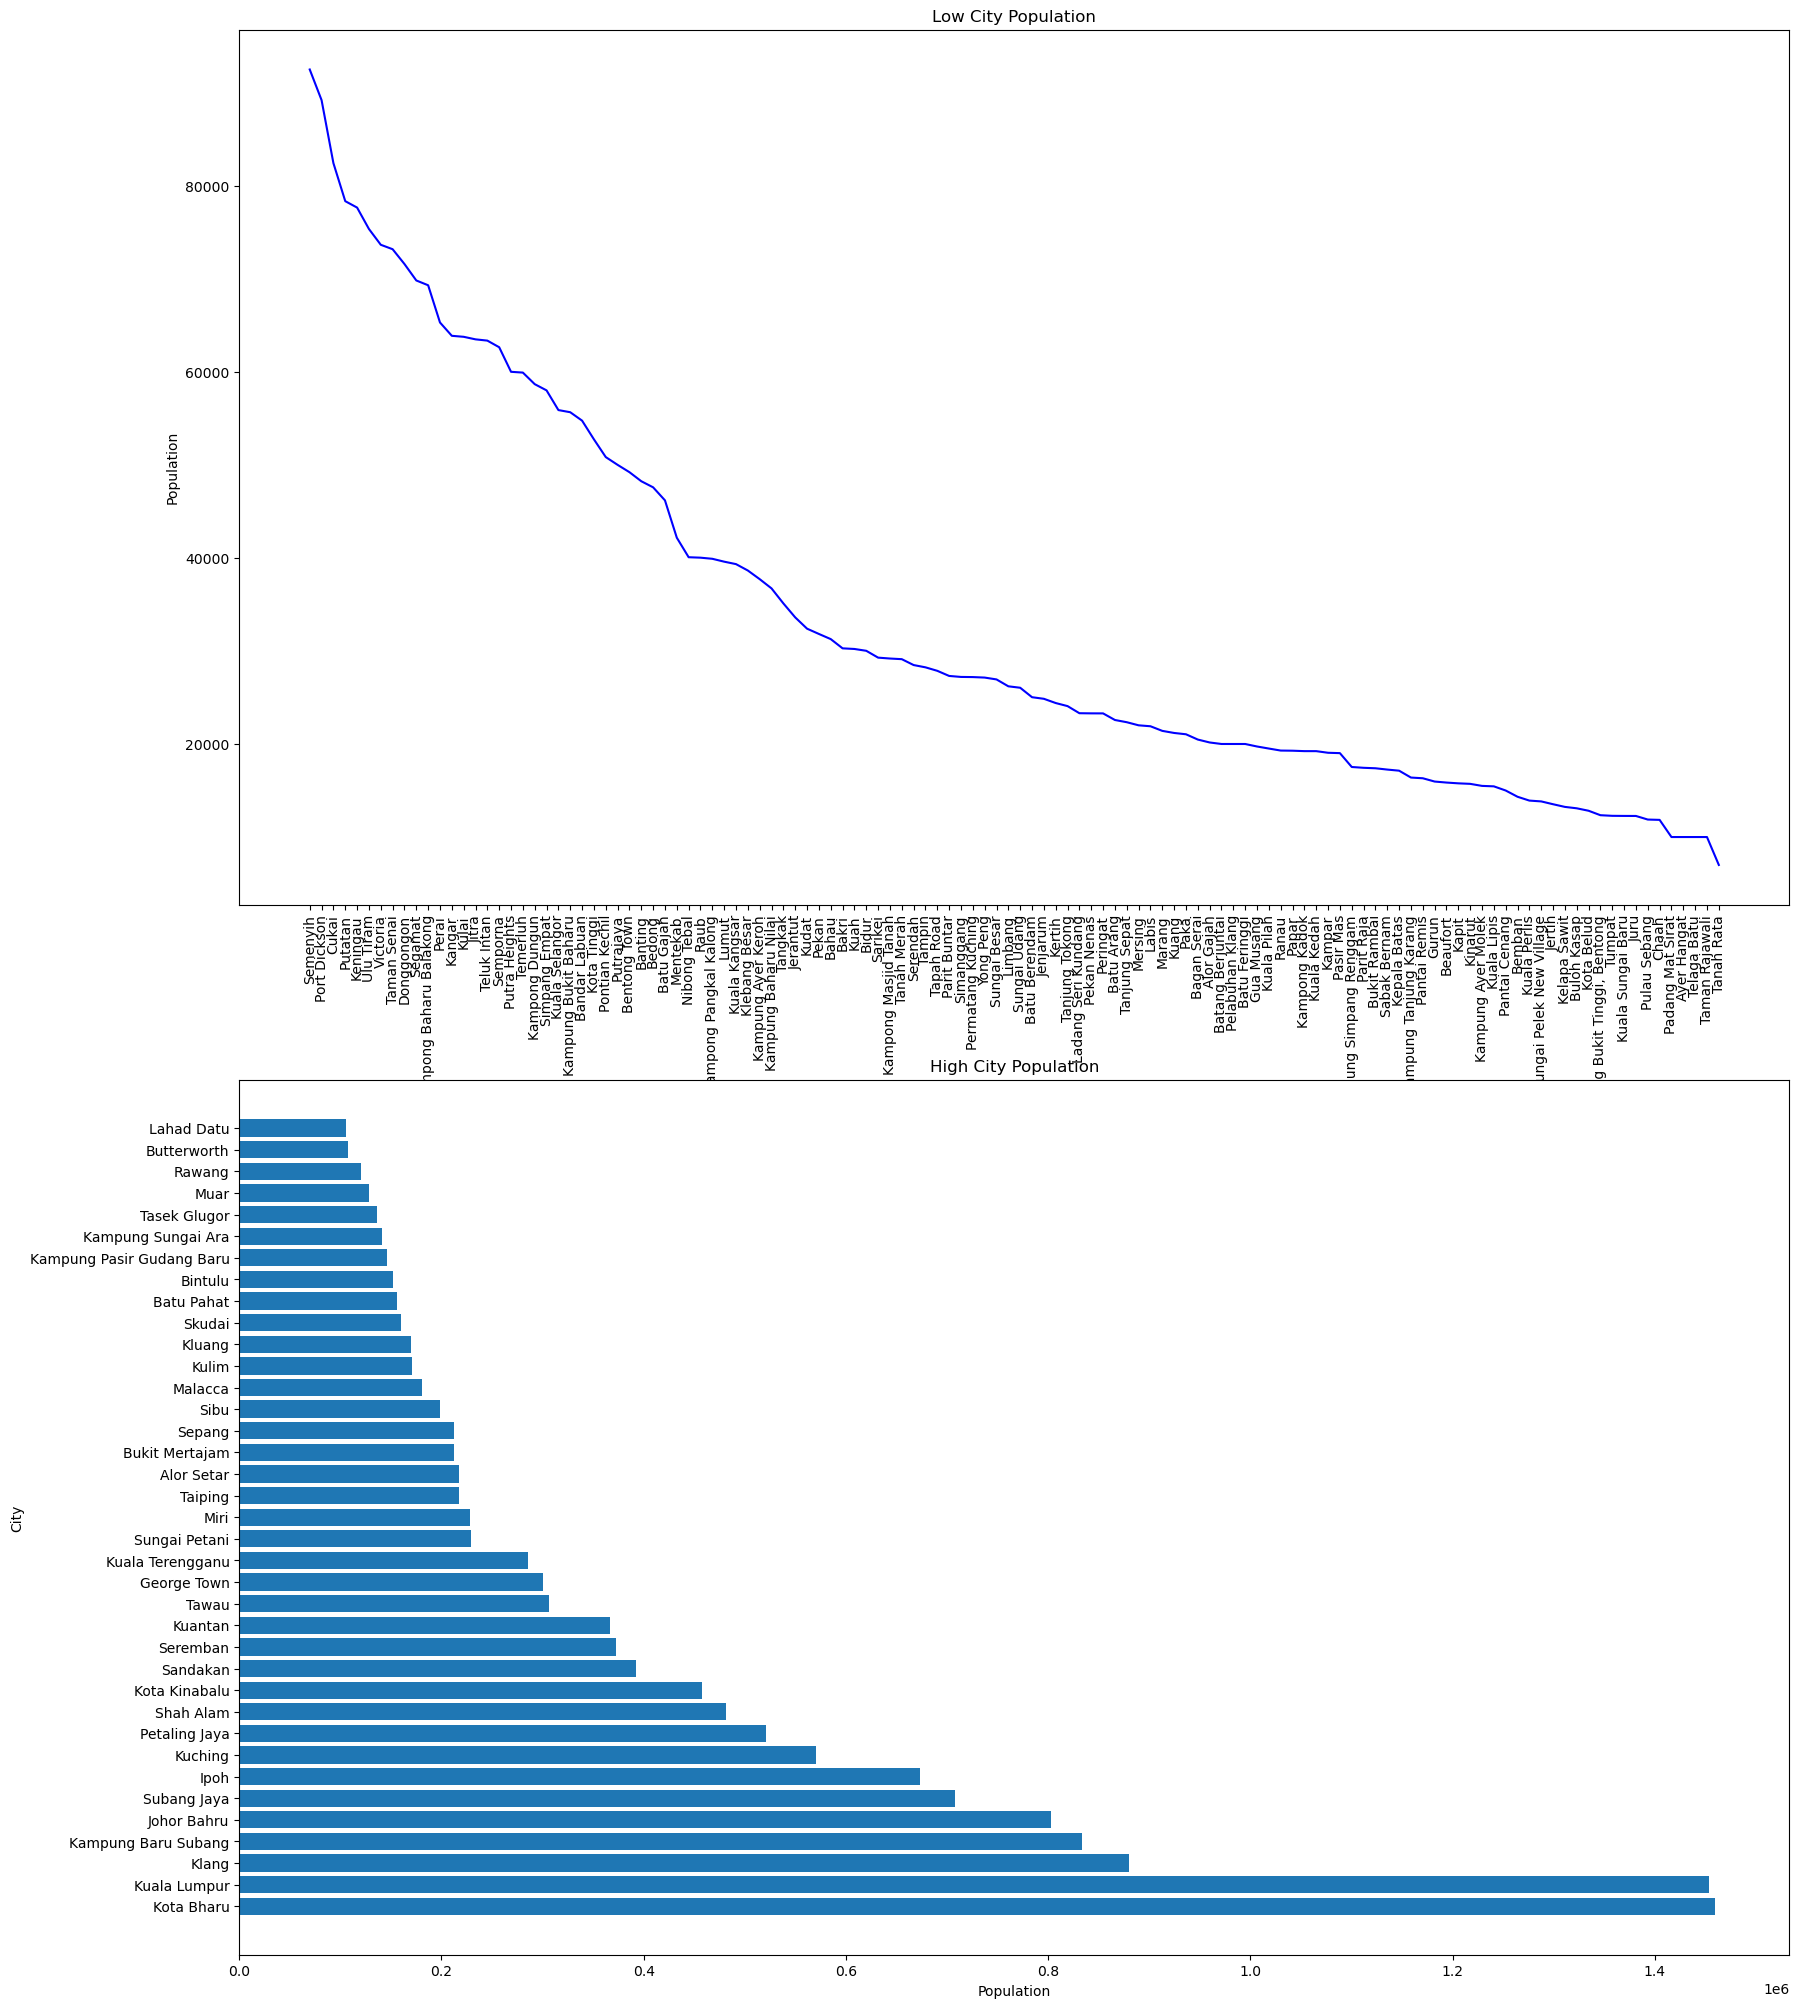

In [189]:



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,25))
ax1.plot(df2["City"], df2["Population"],"b-")
ax1.set_title('Low City Population')
ax2.barh(df1["City"], df1["Population"])
plt.title("High City Population")
ax1.set_xlabel('City')
ax1.tick_params(axis='x', labelrotation = 90)
ax1.set_ylabel('Population')
ax2.set_ylabel('City')
ax2.set_xlabel('Population')
fig.savefig("410921325_mid2-Crawplot.jpg")
